# JuliaDiffEq

### From their page [JuliaDiffEq.org](http://juliadiffeq.org/)
JuliaDiffEq is a Github organization created to unify the packages for solving differential equations in Julia. By providing a diverse set of tools with a common interface, we provide a modular, easily-extendable, and highly performant ecosystem for solving various forms of differential equations (today mainly ODE and embronic PDE).

Includes both wrappers to popular C/Fortran solvers and native Julia implementations. Speedy on Julia implemented code work quite fast, from what I see.

### Outdated (again) benchmarks are on this [page](https://github.com/JuliaDiffEq/DiffEqBenchmarks.jl).

### Currently package have numerical methods to solve
- Discrete equations (function maps, discrete stochastic, like Gillespie/Markov, simulations).
- Ordinary differential equations (ODEs).
- Split and Partitioned ODEs (Symplectic integrators, IMEX Methods).
- Stochastic ordinary differential equations (SODEs or SDEs).
- Random differential equations (RODEs or RDEs).
- Differential algebraic equations (DAEs).
- Delay differential equations (DDEs).
- Mixed discrete and continuous equations (Hybrid Equations, Jump Diffusions).
- (Stochastic) partial differential equations ((S)PDEs) (with both finite difference and finite element methods).

###  Main author
Christopher Rackauckas, currently at University of California, Irvine, Department of Mathematics, University of Maryland, Baltimore, School of Pharmacy and joining Massachusetts Institute of Technology, Department Of Mathematics in 2019.

### Very good learning resource
Christopher Rackauckas, [*Intro to solving differential equations in Julia*](https://www.youtube.com/watch?v=KPEqYtEd-zY).

## Close to $+\infty$ starting time for (almost) everything. It is Julia tradition

## Warmup

In [1]:
using DifferentialEquations, Plots, Latexify
gr()

┌ Info: Recompiling stale cache file /home/kamilfvt/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1190


Plots.GRBackend()

# ODE main problem

We will study equation
\begin{equation}
    \frac{ d u( t ) }{ dt } = f( u( t ), \textrm{par}, t ),
\end{equation}
where $\textrm{par}$ are *parameters* of this equation, on given interval $[ t_{ 0 }, t_{ 1 } ]$.

## 1.1 Simplest example

Consider sepcificly the easier ODE
\begin{equation}
    \frac{ du( t ) }{ dt } = 0.98u( t ).
\end{equation}

In [2]:
f(u, par, t) = 0.98u
u₀ = 1.0
t_span = (0.0, 1.0)

prob = ODEProblem(f, u₀, t_span)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Array{Float64,1}:
 0.0                
 0.10042494449239292
 0.3521855598485865 
 0.6934428591625682 
 1.0                
u: 5-element Array{Float64,1}:
 1.0               
 1.1034222047865465
 1.4121902209793713
 1.9730369896422575
 2.664456142481387 

## Problem succesful solved in 5 lines of code. But this is very easy problem

In [4]:
typeof(sol)

OrdinaryDiffEq.ODECompositeSolution{Float64,1,Array{Float64,1},Nothing,Nothing,Array{Float64,1},Array{Array{Float64,1},1},ODEProblem{Float64,Tuple{Float64,Float64},false,Nothing,ODEFunction{false,typeof(f),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Nothing,DiffEqBase.StandardODEProblem},CompositeAlgorithm{Tuple{Tsit5,Rosenbrock23{0,false,LinSolveFactorize{typeof(LinearAlgebra.lu!)},DataType}},AutoSwitch{Tsit5,Rosenbrock23{0,false,LinSolveFactorize{typeof(LinearAlgebra.lu!)},DataType},Rational{Int64},Float64}},OrdinaryDiffEq.CompositeInterpolationData{ODEFunction{false,typeof(f),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Array{Float64,1},Array{Float64,1},Array{Array{Float64,1},1},OrdinaryDiffEq.CompositeCache{Tuple{OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64},OrdinaryDiffEq.Rosenbrock23ConstantCache{Float64,DiffEqDiffTools.TimeDerivativeWrapper{ODEFunction{false,typeof

## 1.2 Magic of multiple dispatch

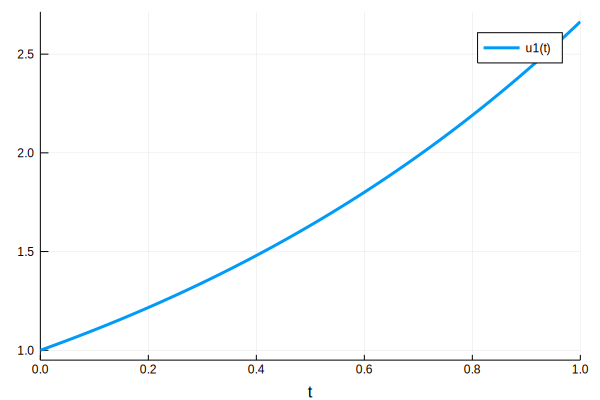

In [5]:
plot(sol)

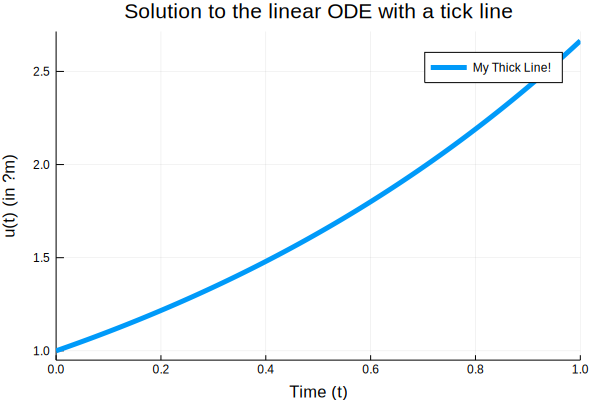

In [6]:
plot(sol, linewidth=5, title="Solution to the linear ODE with a tick line", 
     xaxis="Time (t)", yaxis="u(t) (in μm)",
     label="My Thick Line!")

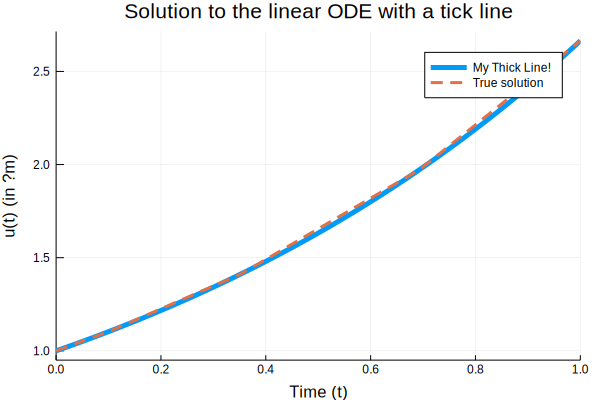

In [7]:
plot!(sol.t, t -> 1.0 * exp(0.98t), lw=3, ls= :dash, label="True solution")

In [8]:
sol.t

5-element Array{Float64,1}:
 0.0                
 0.10042494449239292
 0.3521855598485865 
 0.6934428591625682 
 1.0                

In [9]:
sol.u

5-element Array{Float64,1}:
 1.0               
 1.1034222047865465
 1.4121902209793713
 1.9730369896422575
 2.664456142481387 

### Default solution is "continous'', by using interpolation

In [10]:
x = 0.5
(sol(x), exp(0.98 * x))

(1.63231620704857, 1.632316219955379)

## 2.1 System of equations

We want to solve fameous Lorenz system of equations
\begin{equation}
    \frac{ dx( t ) }{ dt } = \sigma ( y( t ) - x( t ) ),
\end{equation}
\begin{equation}
    \frac{ dy( t ) }{ dt } = x( t ) ( \rho - z( t ) ) - y( t ),
\end{equation}
\begin{equation}
    \frac{ dz( t ) }{ dt } = x( t ) y( t ) - \beta z( t ),
\end{equation}
with constants $\sigma$, $\rho$ and $\beta$.

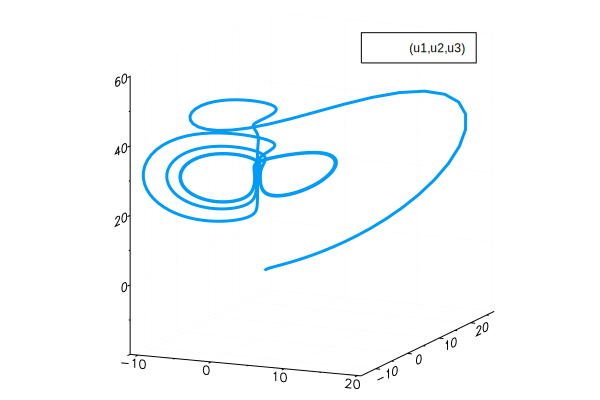

In [13]:
function lorenz!(du, u, par, t)
    σ, ρ, β = par
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end

u₀ = [1.0, 0.0, 0.0]
par = (10, 28, 1/3)
t_span = (0.0, 50.0)

prob = ODEProblem(lorenz!, u₀, t_span, par)

sol = solve(prob)

plot(sol, vars=(1, 2, 3))

## 2.2 Metaprograming strange art

### This is still not so easy to read, so we use strange art of metaprogramming.

In [14]:
lorenz_system! = @ode_def LorenzSystem begin
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x*y - β*z
end σ ρ β

(::LorenzSystem{getfield(Main, Symbol("##5#9")),getfield(Main, Symbol("##6#10")),getfield(Main, Symbol("##7#11")),Nothing,Nothing,getfield(Main, Symbol("##8#12")),Expr,Expr}) (generic function with 2 methods)

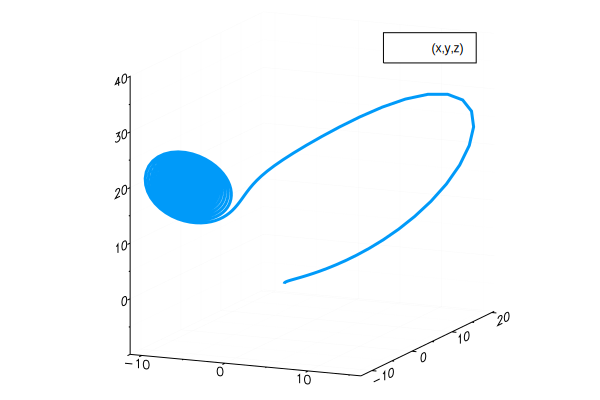

In [16]:
u₀ = [1.0, 0.0, 0.0]
par = (10, 20, 8/3)  # Cannonical values: 10, 28, 8/3
t_span = (0.0, 50.0)

prob = ODEProblem(lorenz_system!, u₀, t_span, par)
sol = solve(prob)

plot(sol, vars=(1, 2, 3))

In [17]:
lorenz_system!.Jex  # Symbolic computation of Jacobian matrix (?) to make computation faster

quote
    internal_var___J[1, 1] = -(internal_var___p[1])
    internal_var___J[1, 2] = internal_var___p[1] * 1
    internal_var___J[1, 3] = 0 * 1
    internal_var___J[2, 1] = -(internal_var___u[3]) + internal_var___p[2]
    internal_var___J[2, 2] = -1 * 1
    internal_var___J[2, 3] = -(internal_var___u[1])
    internal_var___J[3, 1] = internal_var___u[2] * 1
    internal_var___J[3, 2] = internal_var___u[1] * 1
    internal_var___J[3, 3] = -(internal_var___p[3])
    nothing
end

## We now use Latexify.jl

In [18]:
latexalign(lorenz_system!)

L"\begin{align}
\frac{dx}{dt} =& σ \cdot \left( y - x \right) \\
\frac{dy}{dt} =& x \cdot \left( ρ - z \right) - y \\
\frac{dz}{dt} =& x \cdot y - β \cdot z \\
\end{align}
"

## If you want to put it into publication, we need maybe few generic functions more

In [19]:
print(latexalign(lorenz_system!))

\begin{align}
\frac{dx}{dt} =& σ \cdot \left( y - x \right) \\
\frac{dy}{dt} =& x \cdot \left( ρ - z \right) - y \\
\frac{dz}{dt} =& x \cdot y - β \cdot z \\
\end{align}


## If you like and use, please cite
Rackauckas, C. and Nie, Q., 2017. **DifferentialEquations.jl – A Performant and Feature-Rich Ecosystem for Solving Differential Equations in Julia**. *Journal of Open Research Software*, 5(1), p.15. DOI: http://doi.org/10.5334/jors.151.

More articles to cite: [http://juliadiffeq.org/citing.html](http://juliadiffeq.org/citing.html).

## If you want to contribute and write some code you are welcome.